In [167]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import statsmodels.api as sm


df_raw = pd.read_csv('data/Concrete_Data.csv')

pd.isna(df_raw).any()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [168]:
df = df_raw.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'Cement (kg/m³)',
                            'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag (kg/m³)',
                            'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash (kg/m³)',
                            'Water  (component 4)(kg in a m^3 mixture)': 'Water (kg/m³)',
                            'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer (kg/m³)',
                            'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate (kg/m³)',
                            'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate (kg/m³)',
                            'Concrete compressive strength(MPa, megapascals) ': 'Compressive Strength (MPa)'})

In [169]:
df.describe()

,Cement (kg/m³),Blast Furnace Slag (kg/m³),Fly Ash (kg/m³),Water (kg/m³),Superplasticizer (kg/m³),Coarse Aggregate (kg/m³),Fine Aggregate (kg/m³),Age (day),Compressive Strength (MPa)
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [170]:
df.shape

(1030, 9)

In [171]:
df.corr()

,Cement (kg/m³),Blast Furnace Slag (kg/m³),Fly Ash (kg/m³),Water (kg/m³),Superplasticizer (kg/m³),Coarse Aggregate (kg/m³),Fine Aggregate (kg/m³),Age (day),Compressive Strength (MPa)
Cement (kg/m³),1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag (kg/m³),-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash (kg/m³),-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water (kg/m³),-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer (kg/m³),0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate (kg/m³),-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate (kg/m³),-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age (day),0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Compressive Strength (MPa),0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [172]:
# Select all independent variables.
X = df.iloc[:, :-1]
# Select only the target variable.
y = df.iloc[:, -1]

print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cement (kg/m³)              1030 non-null   float64
 1   Blast Furnace Slag (kg/m³)  1030 non-null   float64
 2   Fly Ash (kg/m³)             1030 non-null   float64
 3   Water (kg/m³)               1030 non-null   float64
 4   Superplasticizer (kg/m³)    1030 non-null   float64
 5   Coarse Aggregate (kg/m³)    1030 non-null   float64
 6   Fine Aggregate (kg/m³)      1030 non-null   float64
 7   Age (day)                   1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 1030 entries, 0 to 1029
Series name: Compressive Strength (MPa)
Non-Null Count  Dtype  
--------------  -----  
1030 non-null   float64
dtypes: float64(1)
memory usage: 8.2 KB
None


In [173]:
# Add a constant term to the independent variables (this is necessary for the intercept)
X = sm.add_constant(X)
X = X.rename(columns={'const': 'Intercept'})

# Create and fit the model
model = sm.OLS(y, X).fit()

# Print the regression coefficients
print(model.params)

Intercept                    -23.331214
Cement (kg/m³)                 0.119804
Blast Furnace Slag (kg/m³)     0.103866
Fly Ash (kg/m³)                0.087934
Water (kg/m³)                 -0.149918
Superplasticizer (kg/m³)       0.292225
Coarse Aggregate (kg/m³)       0.018086
Fine Aggregate (kg/m³)         0.020190
Age (day)                      0.114222
dtype: float64


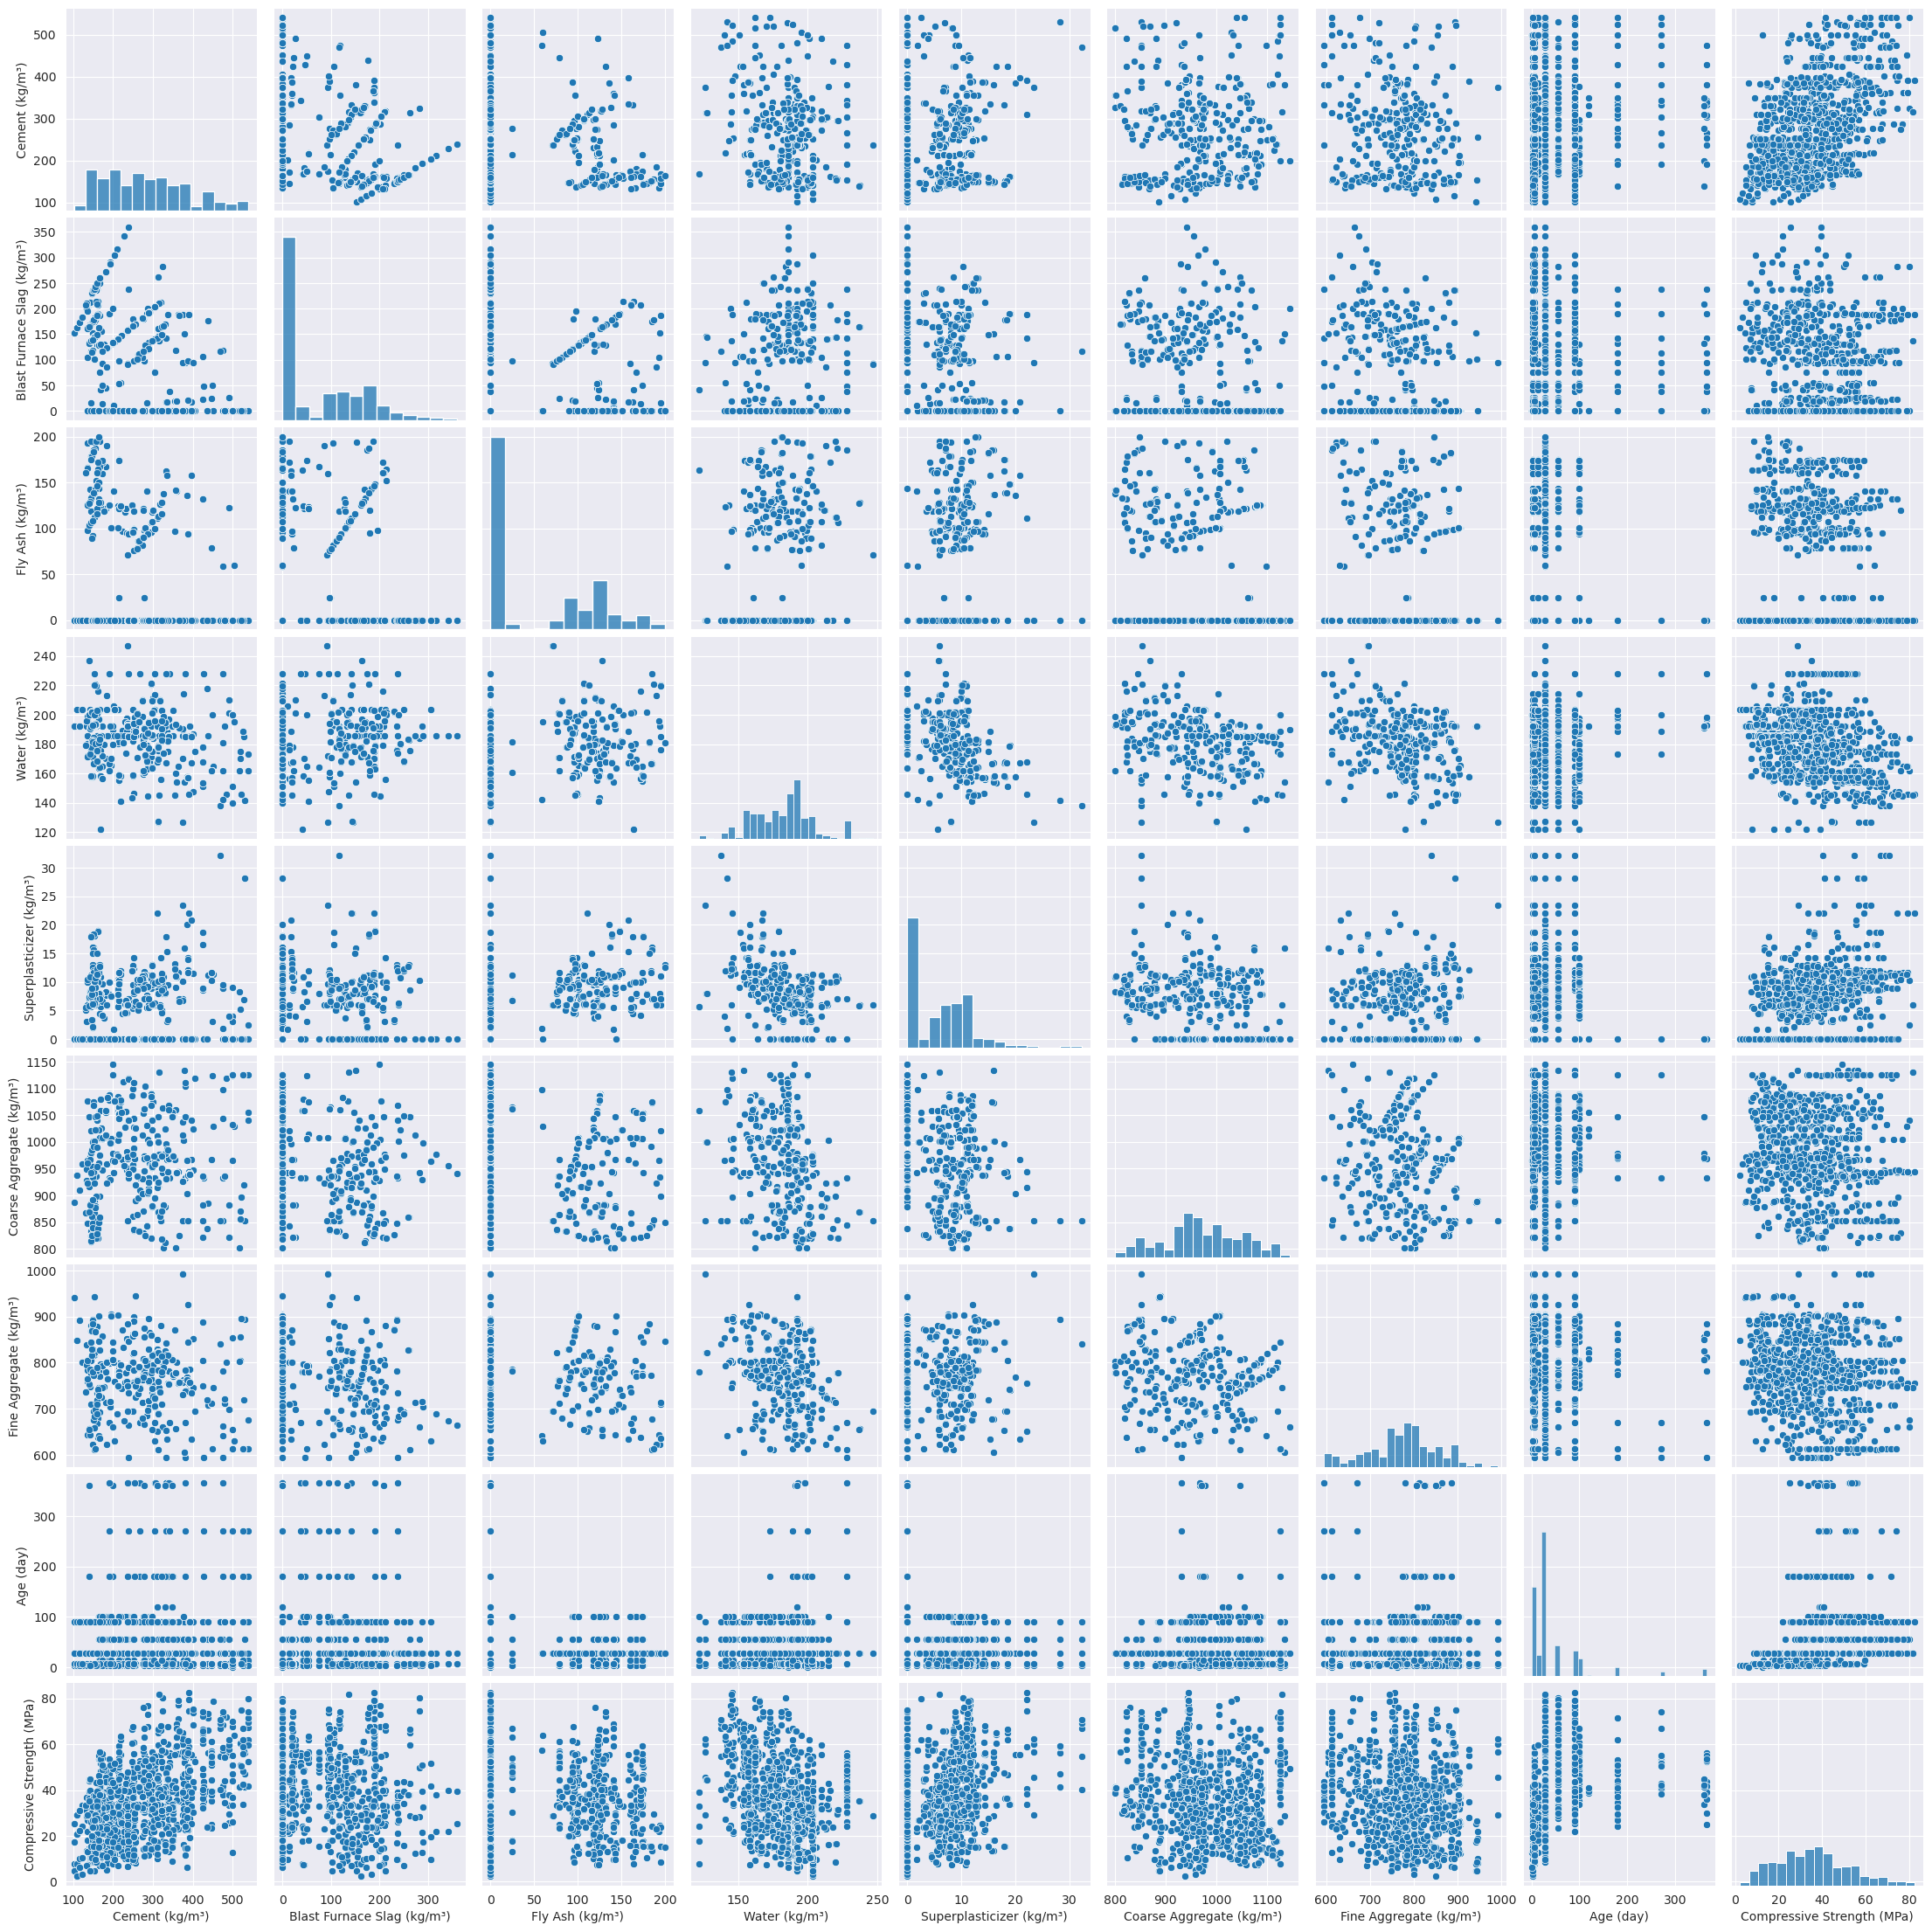

In [174]:
seaborn.pairplot(df)
plt.show()

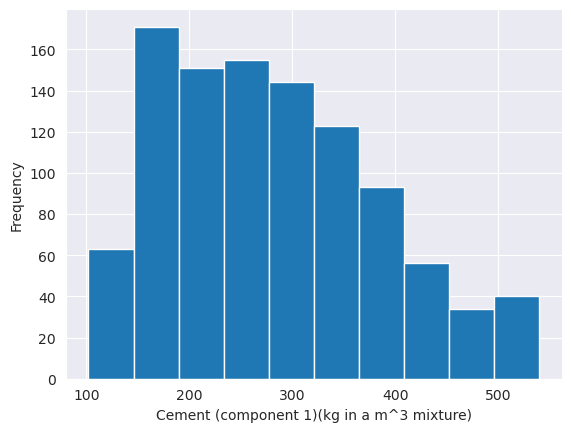

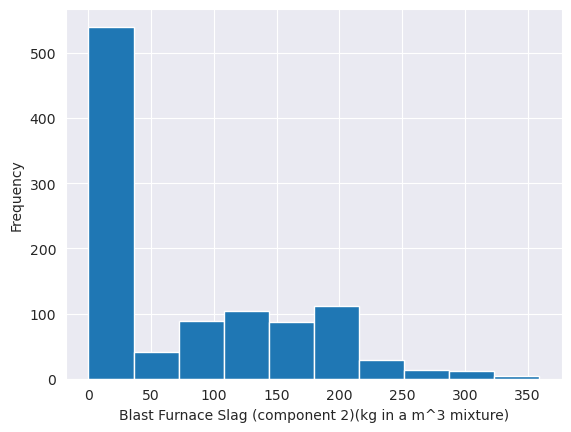

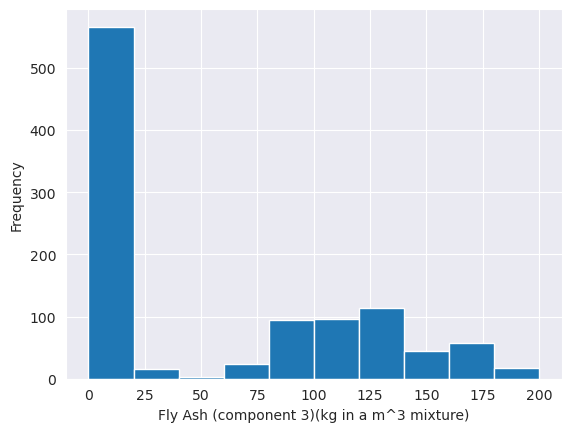

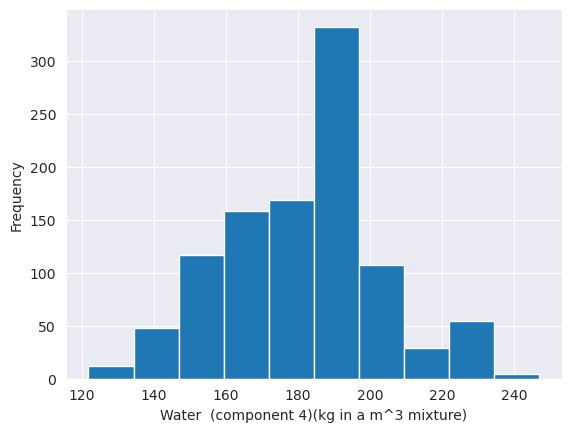

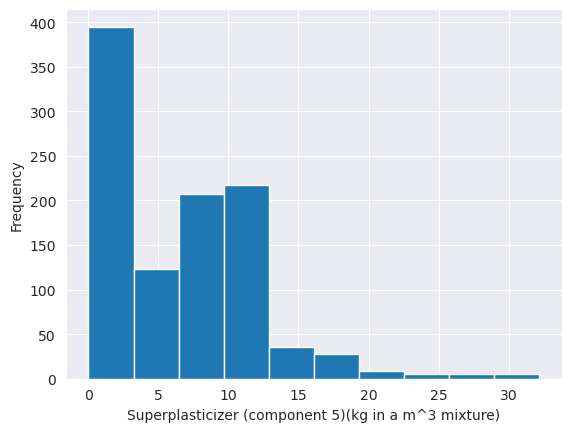

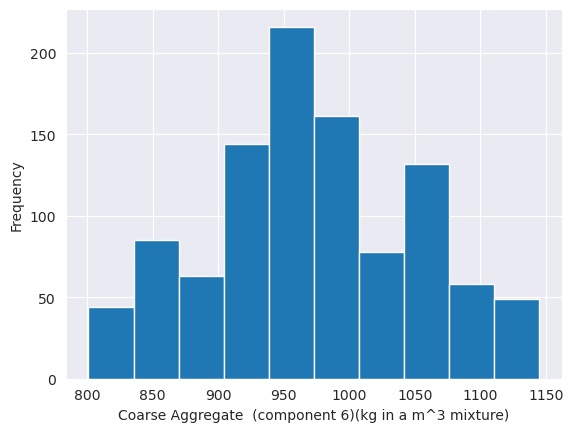

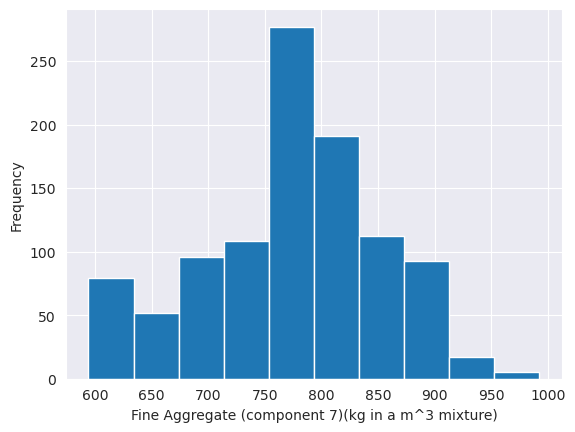

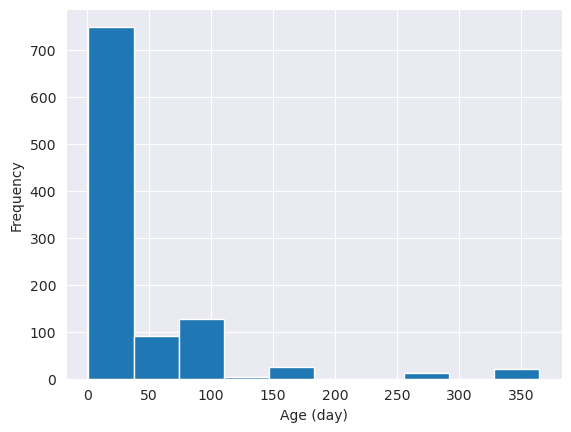

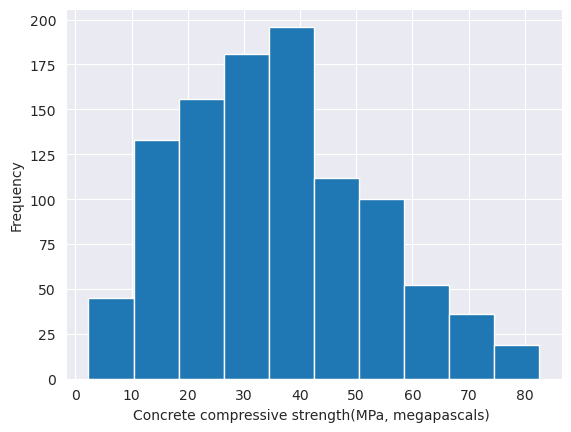

In [175]:
for index in range(0, len(df_raw.columns)):
    plt.hist(df_raw[df_raw.columns[index]])
    plt.xlabel(df_raw.columns[index])
    plt.ylabel('Frequency')
    plt.show()

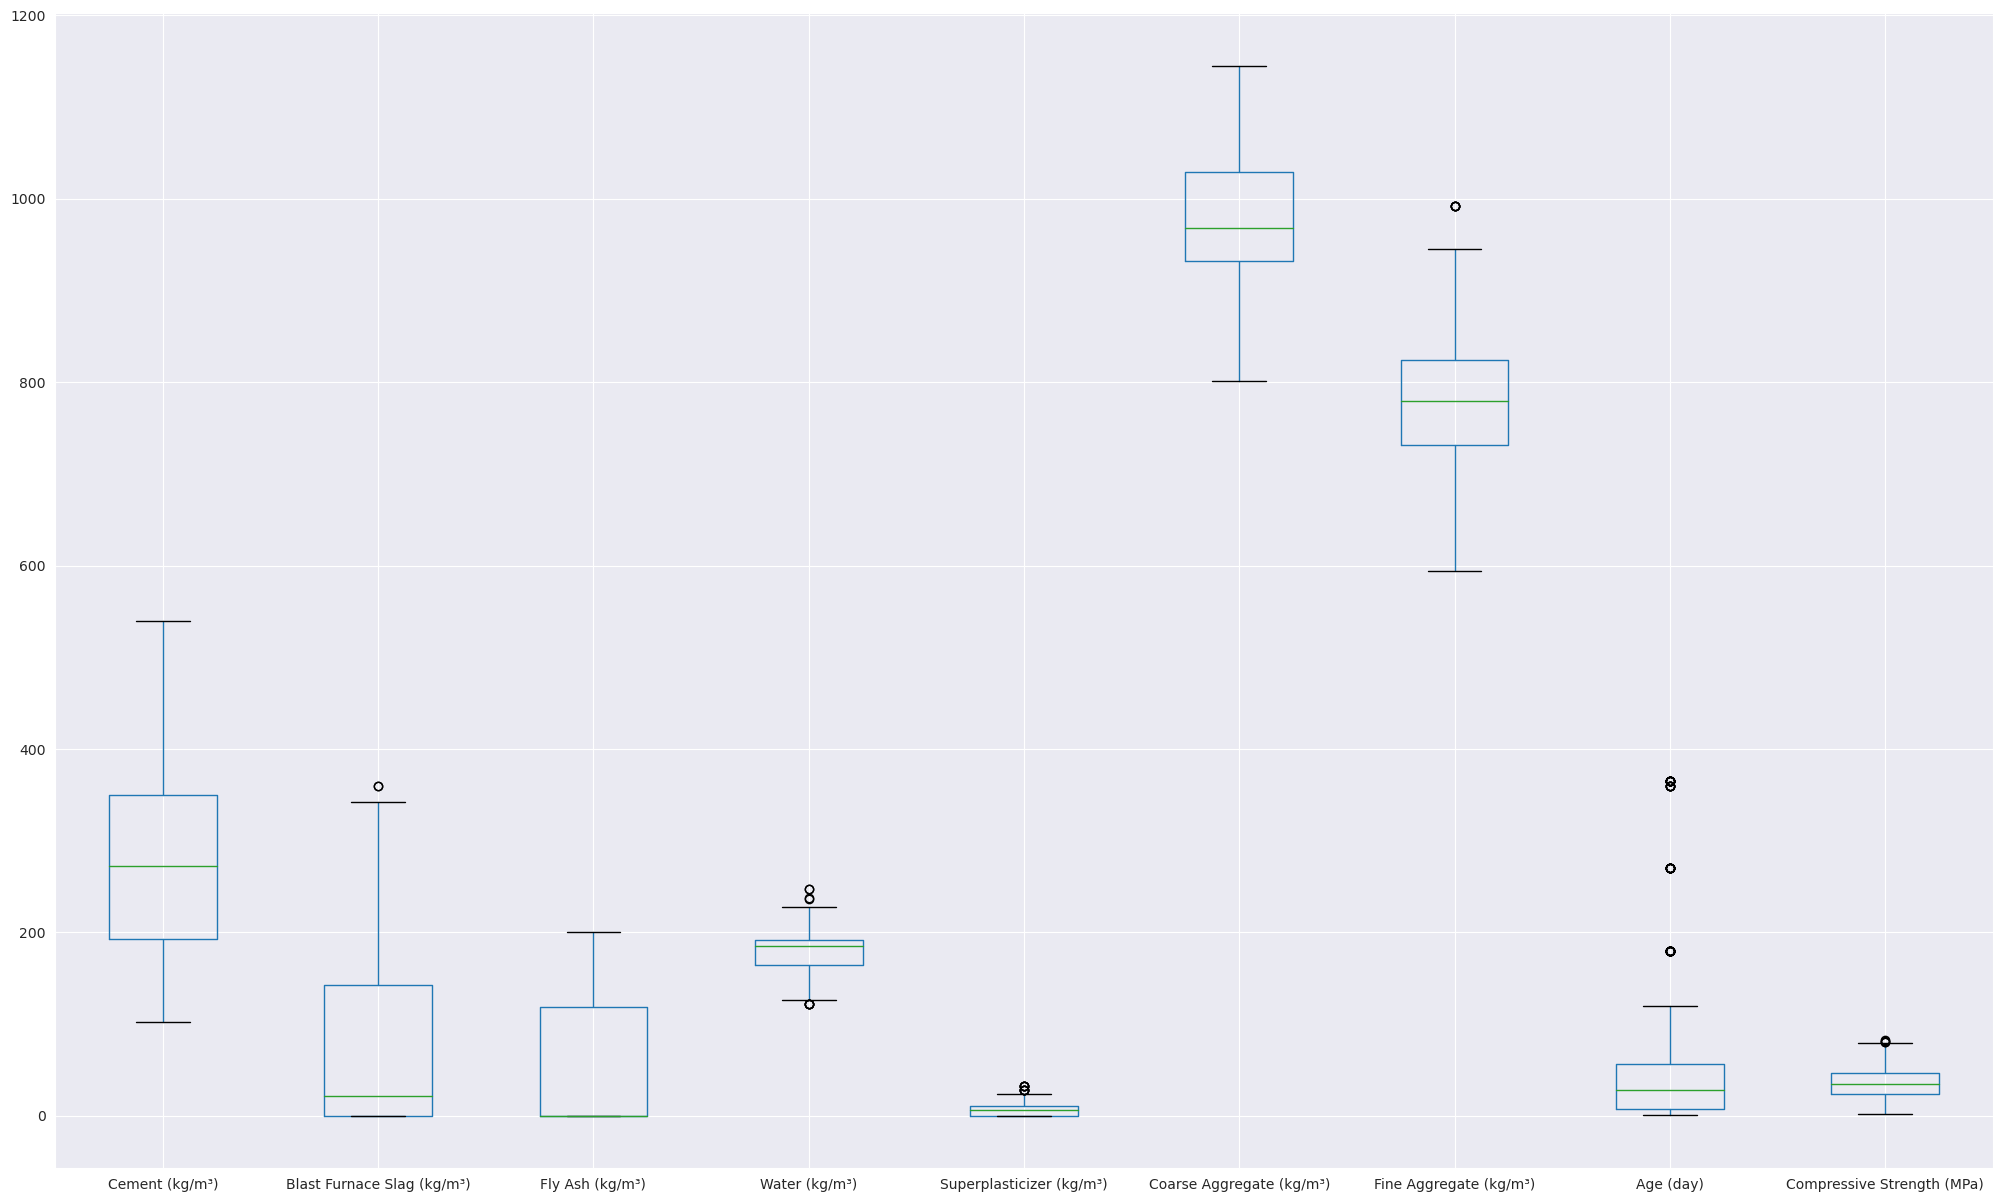

In [176]:
df.boxplot(figsize=(25, 15))
plt.show()
